**Connect Google Drive:**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries:**

In [55]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings("ignore")


**Load Dataset:**

In [56]:
Path="/content/drive/MyDrive/Machine Learning Track/Datasets/covertype.csv"
df=pd.read_csv(Path)

print("Rows and columns in dataset: ", df.shape)
# display first few rows
df.head()

Rows and columns in dataset:  (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


**Data Preprocessing:**

In [57]:
# Step 3: Data Cleaning
# Check for nulls
print(df.isnull().sum().sum())  # Should be 0

# Check duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


df.info()

0
After removing duplicates: (581012, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness

**Separate Features and Target Variables:**

In [58]:
# Step 4: Feature & Target Separation
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']-1


**Split Data into training and testing:**

In [59]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


**Standardization:**

In [60]:
# Step 6: Standardize Numeric Features (optional for tree models, but still useful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train on Random Forest:**

In [61]:
# Step 7: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


**Evaluation of Model:**

In [62]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.9506723884707178
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     63552
           1       0.95      0.97      0.96     84991
           2       0.94      0.96      0.95     10726
           3       0.90      0.84      0.87       824
           4       0.95      0.75      0.84      2848
           5       0.93      0.89      0.91      5210
           6       0.98      0.94      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



**Confusion matrix:**

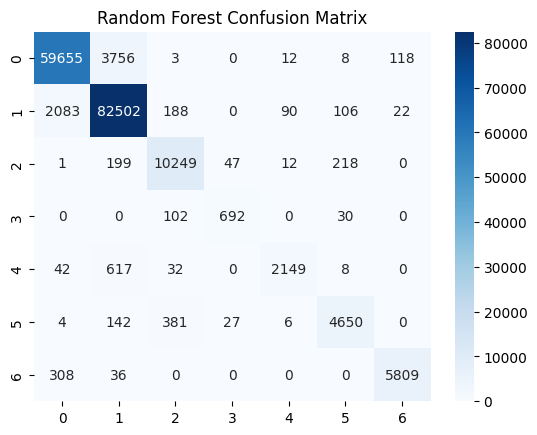

In [63]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

**Train on XGBoost:**

In [64]:
# Step 8: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

**Evaluation of Model:**

In [65]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8693489535524141
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     63552
           1       0.87      0.90      0.88     84991
           2       0.88      0.90      0.89     10726
           3       0.89      0.86      0.88       824
           4       0.91      0.58      0.71      2848
           5       0.85      0.80      0.82      5210
           6       0.95      0.91      0.93      6153

    accuracy                           0.87    174304
   macro avg       0.89      0.83      0.85    174304
weighted avg       0.87      0.87      0.87    174304



**Confusion matrix:**

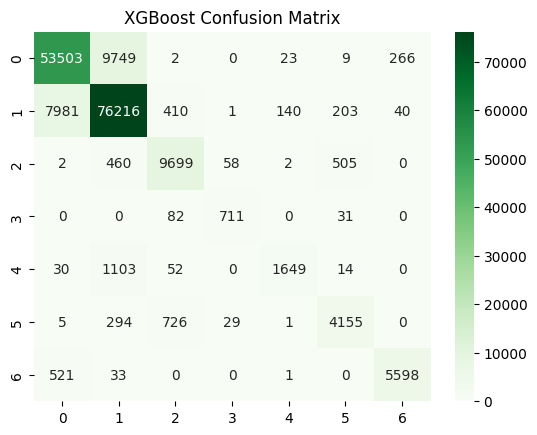

In [66]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

**Feature importance:**

<Figure size 1200x600 with 0 Axes>

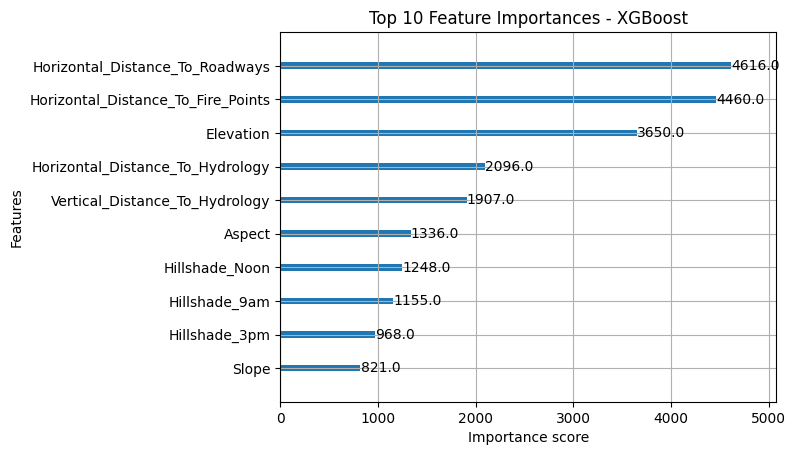

In [67]:
# Feature Importance
plt.figure(figsize=(12, 6))
plot_importance(xgb, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


**Evaluation on new Data:**

In [71]:
# 2. Create new input row (sample values)
new_input = pd.DataFrame([[
    2590, 51, 3, 258, 0, 510, 221, 232, 148, 6279,  # 10 numeric features
    1, 0, 0, 0,                                    # 4 Wilderness_Area (one-hot)
    0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,    # Soil_Type3 = 1
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0       # Rest of Soil_Types = 0
]], columns=X.columns)


# 3. Scale new input using the same scaler
new_input_scaled = scaler.transform(new_input)

# 4. Predict using trained model
predicted_class = xgb.predict(new_input_scaled)[0] + 1  # +1 to restore class label (1–7)
print("Predicted Forest Cover Type:", predicted_class)

# 4. Predict using Random Forest model
predicted_class_rf = rf.predict(new_input_scaled)[0] + 1  # +1 to restore class label (1–7)
print("Random Forest Predicted Cover Type:", predicted_class_rf)



Predicted Forest Cover Type: 4
Random Forest Predicted Cover Type: 2
